<a href="https://colab.research.google.com/github/liumOazed/Forecasting/blob/main/AirMiles_prediction_with_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Forecasting/3. Holt-Winters

/content/drive/MyDrive/Forecasting/3. Holt-Winters


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('airmiles.csv', index_col='Date')

In [ ]:
df.index = pd.to_datetime(df.index, format = "%d/%m/%Y" )

In [ ]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [ ]:
df = df.rename(columns={'airmiles':'y'})

In [ ]:
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

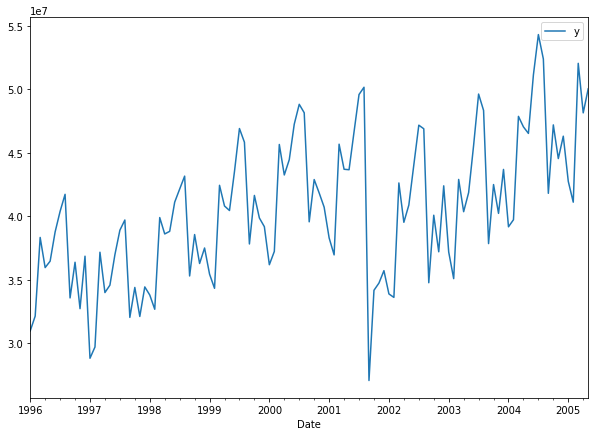

In [ ]:
df['y'].plot(figsize=(10,7), legend=True)

In [ ]:
df

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
...,...
2005-01-01,42760657
2005-02-01,41120838
2005-03-01,52053059


In [ ]:
# Training and Testing sets
months =12
training_set = df.iloc[: -12,:]
test_set = df.iloc[-12:, :]

In [ ]:
# HW
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# modelling HW as forecast
model = ExponentialSmoothing(endog = training_set, trend = 'mul',
                            seasonal ='mul', 
                             seasonal_periods = 12).fit()

In [ ]:
# Predictions
HW_test_pred = model.forecast(steps = len(test_set)).rename("HW")
HW_test_pred

2004-06-01    5.008189e+07
2004-07-01    5.296874e+07
2004-08-01    5.297759e+07
2004-09-01    4.026238e+07
2004-10-01    4.514106e+07
2004-11-01    4.288732e+07
2004-12-01    4.506048e+07
2005-01-01    4.099007e+07
2005-02-01    4.067538e+07
2005-03-01    4.995167e+07
2005-04-01    4.748805e+07
2005-05-01    4.804796e+07
Freq: MS, Name: HW, dtype: float64

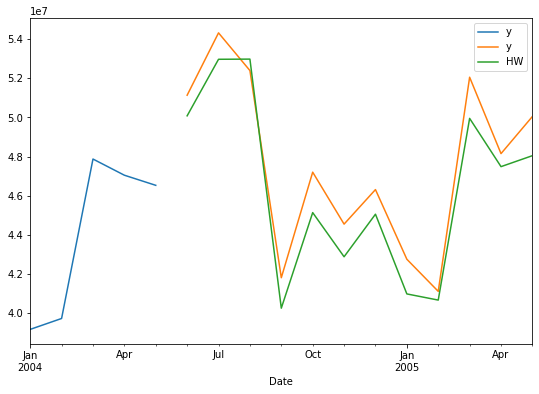

In [ ]:
# Visualization (plot training, testing and predicted ones)
training_set['y']['2004-01-01':].plot(figsize=(9,6), legend=True)
test_set['y'].plot(legend=True)
HW_test_pred.plot(legend=True)

In [ ]:
# Model Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = round(mean_absolute_error(test_set['y'], HW_test_pred),0)
mae

1375725.0